In [1]:
from joblib import load
from glob import glob
import random
import os

from sklearn.preprocessing import LabelEncoder
import cv2
from matplotlib import pyplot as plt

from src.utils import visualize_annotations
from src.detect_interaction import detect_interaction

In [2]:
clf = load('balanced_forest.joblib') 
anno_list = glob(os.path.join('data/data_inter/annotations/20200519/clip_33_1450/', '**/*.txt'), recursive=True)

In [4]:
#Pick a random item off the list
index = random.randint(0, len(anno_list))
anno_file= anno_list[index]
img_file = anno_file.replace('annotations_', 'frame_').replace('annotations', 'clips').replace('.txt','.jpg')

# visualize_annotations(img_path=img_file, anno_path=anno_file)
try:
    coords, predictions = detect_interaction(img_path=img_file, anno_path=anno_file, classifier=clf)
except:
    print('No interactions')

c:\Users\vismi\Documents\University\7th Semester\Semester Project\ce7_741_HOI_detection\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


IndexError: list index out of range

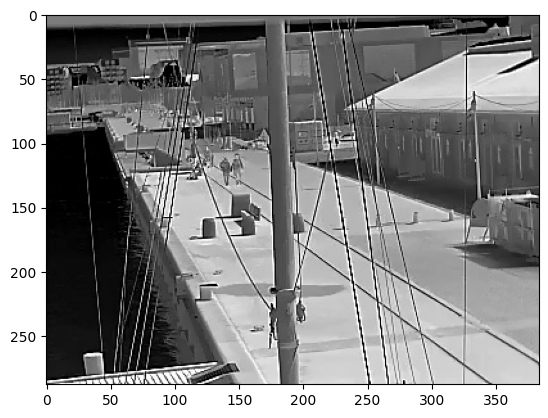

In [6]:
le = LabelEncoder()
le.fit(['human-ride-bicycle', 'human-walk-bicycle', 'human-hold-bicycle', 'human-ride-motorcycle', 'human-walk-motorcycle'])

from matplotlib.patches import Rectangle
frame = cv2.imread(img_file)
label = le.inverse_transform(predictions)
plt.imshow(frame)
plt.text(coords[0], coords[1], label, fontsize = 7, c='white')
plt.gca().add_patch(Rectangle((coords[0],coords[1]),(coords[2]-coords[0]),(coords[3]-coords[1]),
                edgecolor='red',
                facecolor='none',
                lw=1))

In [3]:
from src.utils import create_output_video


create_output_video(clf=clf, clip='data/annotated_data/clips/20200518/clip_15_0659.mp4')